### Import the relevant libraries

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram

sns.set()

### import iris dataset

In [2]:
from sklearn import datasets
iris=datasets.load_iris()

In [3]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
cols=['sepal_length','sepal_width','petal_length','petal_width']
df=pd.DataFrame(data=iris.data,columns=cols)

In [6]:
df['class']=iris.target
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,2
135,7.7,3.0,6.1,2.3,2
11,4.8,3.4,1.6,0.2,0
102,7.1,3.0,5.9,2.1,2
49,5.0,3.3,1.4,0.2,0


- first , Hierarchical clustering  without normalizing

In [7]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

- let n_cluster=3

In [8]:
data=df.iloc[:,:4]
target=df.iloc[:,4]

- complete link clustering

In [9]:
complete=AgglomerativeClustering(n_clusters=3,linkage='complete')
complete_predict=complete.fit_predict(data)

- average link clustering

In [10]:
average =AgglomerativeClustering(n_clusters=3,linkage='average')
average_predict=average.fit_predict(data)

- ward method clustering

In [11]:
ward=AgglomerativeClustering(n_clusters=3,linkage='ward')
ward_predict=ward.fit_predict(data)

- claculate adjusted_rand_score for each cluster method

In [12]:
complete_score=adjusted_rand_score(target,complete_predict)
average_score=adjusted_rand_score(target,average_predict)
ward_score=adjusted_rand_score(target,ward_predict)

print('complete link clustering score :',complete_score)
print('average link clustering score:',average_score)
print('ward method score:',ward_score)

complete link clustering score : 0.6422512518362898
average link clustering score: 0.7591987071071522
ward method score: 0.7311985567707746


- Average Link Hierarchical clustring is the highest score

### now ,lets try normalize the dataset, and calculate adjusted_rand_score again

In [13]:
data_normalize=normalize(data)
data_normalize=pd.DataFrame(data=data_normalize,columns=cols)
data_normalize.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


- complete link clustering

In [14]:
complete=AgglomerativeClustering(n_clusters=3,linkage='complete')
complete_predict=complete.fit_predict(data_normalize)

- average link clustering

In [15]:
average=AgglomerativeClustering(n_clusters=3,linkage='average')
average_predict=average.fit_predict(data_normalize)

- ward method clustering

In [16]:
ward=AgglomerativeClustering(n_clusters=3,linkage='ward')
ward_predict=ward.fit_predict(data_normalize)

- claculate adjusted_rand_score for each cluster method after data normalizing

In [17]:
complete_score=adjusted_rand_score(target,complete_predict)
average_score=adjusted_rand_score(target,average_predict)
ward_score=adjusted_rand_score(target,ward_predict)

print('complete link clustering score :',complete_score)
print('average link clustering score:',average_score)
print('ward method score:',ward_score)

complete link clustering score : 0.644447235392006
average link clustering score: 0.5583714437541352
ward method score: 0.8856970310281228


- Ward method Hierarchical clustring is the highest score after normalizing

# Visiualizing 

### using seaborn

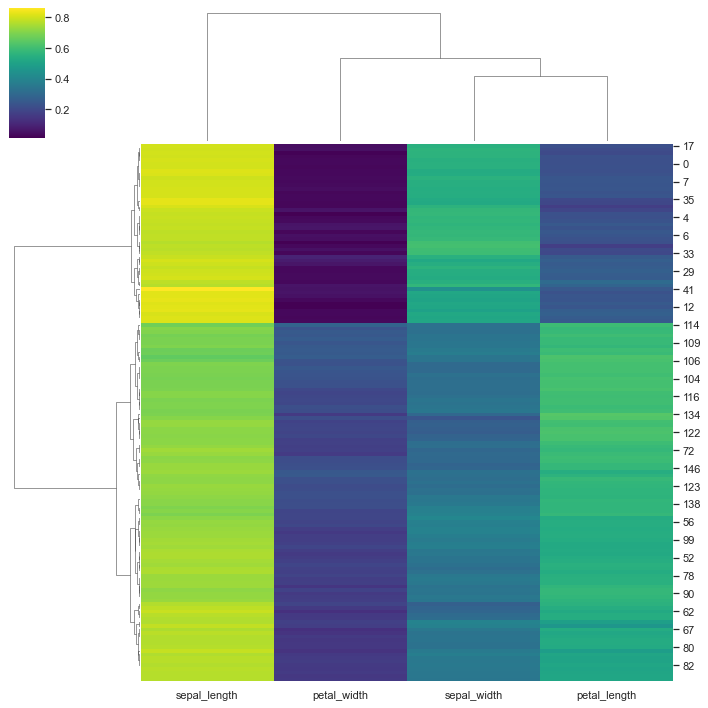

In [18]:
sns.clustermap(data_normalize,method='ward',cmap='viridis')
plt.show()

### Dendrogram visualization with scipy

In [19]:
linkage_type='ward'

In [20]:
linkage_matrix=linkage(data_normalize,linkage_type)

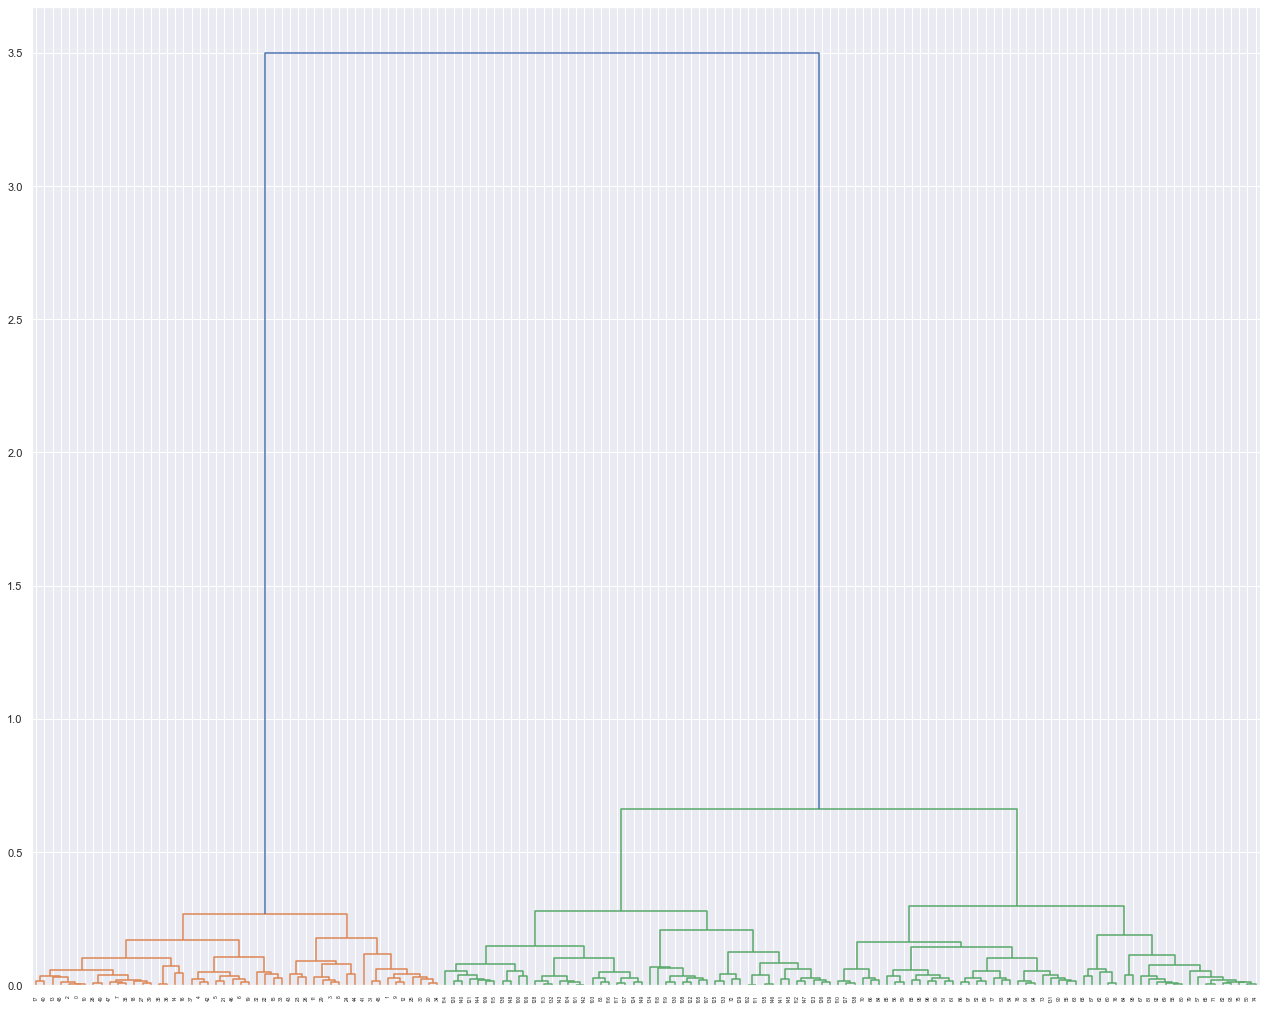

In [21]:
plt.figure(figsize=(22,18))
dendrogram(linkage_matrix)
plt.show()